In [1]:
# First import the libraries that we need to use
import pandas as pd
import requests
import json
from a_keys import API_PASS, API_KEY, API_SECRET
import coinbasepro as cbp

In [2]:
import json, hmac, hashlib, time, requests, base64
from requests.auth import AuthBase

# Create custom authentication for Exchange
class CoinbaseExchangeAuth(AuthBase):
    def __init__(self, api_key, secret_key, passphrase):
        self.api_key = api_key
        self.secret_key = secret_key
        self.passphrase = passphrase

    def __call__(self, request):
        timestamp = str(time.time())
        message = timestamp + request.method + request.path_url + (request.body or '')
        hmac_key = base64.b64decode(self.secret_key)
        signature = hmac.new(hmac_key, message, hashlib.sha256)
        signature_b64 = signature.digest().encode('base64').rstrip('\n')

        request.headers.update({
            'CB-ACCESS-SIGN': signature_b64,
            'CB-ACCESS-TIMESTAMP': timestamp,
            'CB-ACCESS-KEY': self.api_key,
            'CB-ACCESS-PASSPHRASE': self.passphrase,
            'Content-Type': 'application/json'
        })
        return request

api_url = 'https://api.pro.coinbase.com/'
auth = CoinbaseExchangeAuth(API_KEY, API_SECRET, API_PASS)

In [4]:
client = cbp.PublicClient()

In [5]:
# You can get list of coins on their site
# time granularity is based on seconds per step, so 3600 is an hour
# max call step is 300
data=client.get_product_historic_rates('ALGO-USD',granularity="3600")


In [6]:
type(data)

list

In [8]:
df=pd.DataFrame(data)

In [31]:
df

,time,low,high,open,close,volume
0,2021-09-27 04:00:00,1.8046,1.8342,1.8238,1.8069,623891
1,2021-09-27 03:00:00,1.8032,1.8430,1.8259,1.8235,1385716
2,2021-09-27 02:00:00,1.8194,1.8584,1.8202,1.8259,2317788
3,2021-09-27 01:00:00,1.7979,1.8419,1.7997,1.8207,2548383
4,2021-09-27 00:00:00,1.735,1.8405,1.7765,1.8005,3960984
...,...,...,...,...,...,...
295,2021-09-14 21:00:00,1.9889,2.0540,2.0339,2.0106,3862070
296,2021-09-14 20:00:00,2.001,2.0412,2.0383,2.0339,3254817
297,2021-09-14 19:00:00,2.0174,2.0499,2.0328,2.0368,2327364
298,2021-09-14 18:00:00,2.01,2.0811,2.0801,2.0321,3608429


In [41]:
df['low']

0      1.8046
1      1.8032
2      1.8194
3      1.7979
4       1.735
        ...  
295    1.9889
296     2.001
297    2.0174
298      2.01
299    2.0599
Name: low, Length: 300, dtype: object

# Data Cleaning, Conversions, and Visualization
1. The numeric values are not in float so have trouble being visualized via matplotlib
2. Time is running back per row, so for better plotting, sort with time going forwards
4. Set time as the new Index
3. Time step is in hours, so to get a more reactive algorithm, maybe create a second DF of 15 minute steps

In [63]:
def df_tonumeric_setindex(df):
    for column in df:
        if column =='time': 
            pass
        else:
            df[column]=pd.to_numeric(df[column])
    
    df.set_index('time').sort_index(ascending=True)
    return(df)



In [66]:
df=df_tonumeric_setindex(df)

<AxesSubplot:xlabel='time'>

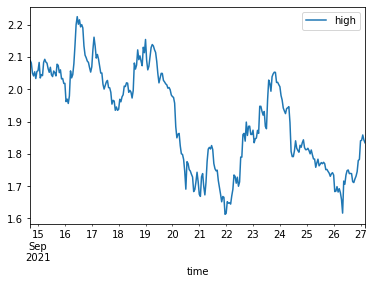

In [68]:
df.plot(x='time',y='high')

<AxesSubplot:xlabel='time'>

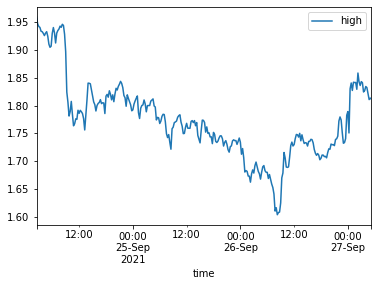

In [69]:
data2=client.get_product_historic_rates('ALGO-USD',granularity="900")
df2=pd.DataFrame(data2)
df2=df_tonumeric_setindex(df2)
df2.plot(x='time',y='high')

# Adding indicators

In [ ]:
client = cbp.PublicClient()

In [26]:
#the goal here is to get last 300 hours of algo in dataframe form, save into a file, iterate from the last date time interval, convert the form into usable for GAN

#Start timedate

#if gather=true
#  data=client.get_product_historic_rates('ALGO-USD',granularity="3600", startdate, )
#  sleep x
#  startdate= data[-1].time